In [1]:
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

from transforms import YCbCrEnhance,MultiBranchYCbCrPreprocess

In [2]:
img_path = Path("../data/DRIVE/training/images/21_training.tif")

pil_img = Image.open(img_path).convert("RGB")
img_np = np.array(pil_img)

sample = {"image":img_np}

In [3]:
transform = MultiBranchYCbCrPreprocess(
    clahe_clip_limit=2.0,
    clahe_tile_grid_size=(8, 8),
    unsharp_alpha=1.0,
    unsharp_sigma=1.0,
    w1=0.5,  # 原始 Y
    w2=2,  # CLAHE(Y)
    w3=2,  # Unsharp(Y)
)

In [4]:
sample_out = transform(sample)
img_out = sample_out["image"]

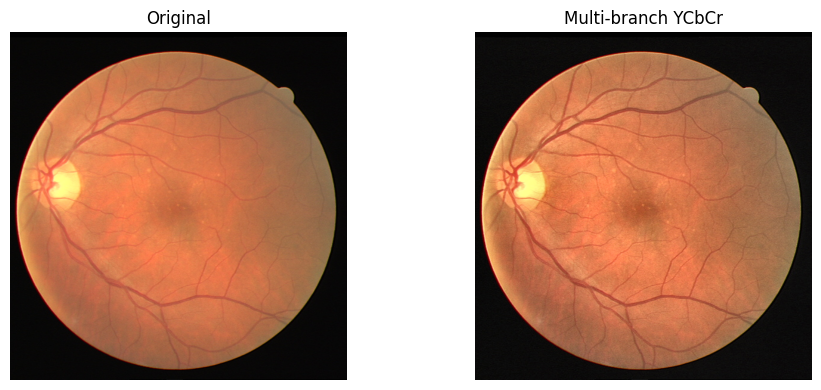

In [5]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Multi-branch YCbCr")
plt.imshow(img_out)
plt.axis("off")
plt.tight_layout()
plt.show()